# Convolutional Neural Network

Coursera Google Colab: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%202%20-%20Notebook.ipynb

Github fashion mnist: https://github.com/zalandoresearch/fashion-mnist

## Fashion MNIST with DNN:

In [0]:
# Fashion MNIST with DNN (from previous exercise):
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
print(tf.__version__)

# Callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # if(logs.get('loss')<0.01):
    if(logs['accuracy']>0.99):   
      print('\n Reached 99% accurcay. Training converged!')
      self.model.stop_training = True

callback = myCallback()


mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


training_images=training_images / 255.0
test_images=test_images / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callback])

print('\n test loss:')
test_loss = model.evaluate(test_images, test_labels)


# Predictions
test_predictions = model.predict(test_images)
test_example = 0
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5033 - accuracy: 0.8246
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3815 - accuracy: 0.8622
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3379 - accuracy: 0.8776
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3134 - accuracy: 0.8844
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.3401 - accuracy: 0.8773
test example0 probabilities:[5.7967254e-06 3.2116418e-09 8.5422606e-08 2.8841200e-08 1.1680191e-06
 1.2591104e-03 7.2007003e-07 1.0856860e-02 1.0283064e-05 9.8786598e-01]
test example 0 label: 9
test example 0 prediction: 9


In [0]:
training_images.shape
print(training_images[6000])

training_images_4d=training_images.reshape(60000, 28, 28, 1)
training_images_4d.shape
print(training_images_4d[6000])

[[0.         0.         0.         0.         0.         0.
  0.01176471 0.         0.         0.         0.18823529 0.28627451
  0.37647059 0.43137255 0.45098039 0.43137255 0.45098039 0.41960784
  0.35294118 0.28235294 0.19607843 0.09803922 0.         0.
  0.00392157 0.00392157 0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.01960784
  0.         0.05882353 0.7254902  0.95294118 0.95686275 0.96862745
  0.96078431 0.96078431 0.95686275 0.96862745 0.96470588 0.96862745
  0.98039216 0.98431373 0.96470588 0.96862745 0.89019608 0.16470588
  0.         0.00392157 0.         0.        ]
 [0.         0.         0.         0.         0.01568627 0.
  0.01568627 0.8627451  0.41176471 0.21960784 0.44705882 0.28627451
  0.31764706 0.38823529 0.29803922 0.14901961 0.53333333 0.26666667
  0.07058824 0.32156863 0.28627451 0.04313725 0.50588235 0.94117647
  0.         0.         0.00392157 0.        ]
 [0.         0.         0.00392157 0.         0.00392157 0.
  0.545

## Fashion MNIST with CNN:

In [0]:
# Fashion MNIST with CNN (from previous exercise):
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
print(tf.__version__)

# Callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # if(logs.get('loss')<0.01):
    if(logs['accuracy']>0.99):   
      print('\n Reached 99% accurcay. Training converged!')
      self.model.stop_training = True

callback = myCallback()


mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# !!! To use convolution we need to reshape the data into 4D tensors!!!
training_images=training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)

training_images=training_images / 255.0
test_images=test_images / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D( 64, (3,3), activation=tf.nn.relu, input_shape=(28, 28, 1), data_format="channels_last" ),   # convolution layer: 64 convolutions (different filters), (3, 3) 3x3pixels filters, !! first layer always needs the input!!! input (28x28x1)  images of 28x28 pixels with 1 bit of info (grey), it would b 3 if color.
  tf.keras.layers.MaxPooling2D(2, 2), # compresses 2x2 (4) pixels into 1x1 pixel picking up the max value.
  tf.keras.layers.Conv2D( 64, (3,3), activation=tf.nn.relu ),   # convolution layer: 64 convolutions (different filters), (3, 3) 3x3pixels filters, input (28x28x1); no need to specify input here because it's a hidden layer.
  tf.keras.layers.MaxPooling2D( pool_size=(2, 2) ),  # compresses 2x2 (4) pixels into 1x1 pixel picking up the max value.
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary!
model.summary()

model.fit(training_images, training_labels, epochs=20, callbacks=[callback])

print('\n test loss:')
test_loss = model.evaluate(test_images, test_labels)


# Predictions
test_predictions = model.predict(test_images)
test_example = 0
print('\ntest example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)         

# Visualazing the Convolutions and Pooling

In [0]:
i = 0
for val in test_labels[:20] :
  print(i,val)
  i+=1

0 9
1 2
2 1
3 1
4 6
5 1
6 4
7 6
8 5
9 7
10 4
11 5
12 7
13 3
14 4
15 1
16 2
17 4
18 8
19 0


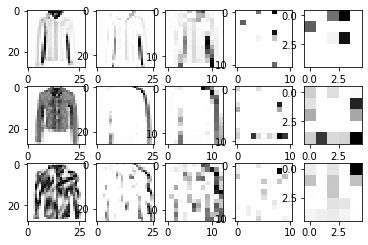

In [0]:
# Plotting the Convolutions and Poolings for three different test examples:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,5)
FIRST_IMAGE=6
SECOND_IMAGE=10
THIRD_IMAGE=17
CONVOLUTION_NUMBER = 0  # out of the 64 chosen in the model set-up
colormap = 'Greys'
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(28, 28), cmap=colormap)
axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(28, 28), cmap=colormap)
axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28, 28), cmap=colormap)
for x in range(0,4):  # loop thru the first 4 layers (which are the 2 convs and the 2 pools)
  # image 1:
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]   # choosing layer x (0 to 3) and then reshape it to a readable image.
  axarr[0,x+1].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap=colormap)
  axarr[0,x+1].grid(False)
  # image 2:
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x+1].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap=colormap)
  axarr[1,x+1].grid(False)
  # image 3:
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x+1].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap=colormap)
  axarr[2,x+1].grid(False)

## Exercises

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [0]:
# Fashion MNIST with CNN (from previous exercise):
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
print(tf.__version__)

# Callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # if(logs.get('loss')<0.01):
    if(logs['accuracy']>0.99):   
      print('\n Reached 99% accurcay. Training converged!')
      self.model.stop_training = True

callback = myCallback()


mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# !!! To use convolution we need to reshape the data into 4D tensors!!!
training_images=training_images.reshape(training_images.shape[0], 28, 28, 1)
test_images=test_images.reshape(test_images.shape[0], 28, 28, 1)

training_images=training_images / 255.0
test_images=test_images / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D( 32, (3,3), activation='relu', input_shape=(28, 28, 1) ),  #, data_format="channels_last" ),   # convolution layer: 64 convolutions (different filters), (3, 3) 3x3pixels filters, !! first layer always needs the input!!! input (28x28x1)  images of 28x28 pixels with 1 bit of info (grey), it would b 3 if color.
  tf.keras.layers.MaxPooling2D(2, 2), # compresses 2x2 (4) pixels into 1x1 pixel picking up the max value.
  # tf.keras.layers.Conv2D( 64, (3,3), activation='relu' ),   # convolution layer: 64 convolutions (different filters), (3, 3) 3x3pixels filters, input (28x28x1); no need to specify input here because it's a hidden layer.
  # tf.keras.layers.MaxPooling2D( pool_size=(2, 2) ),  # compresses 2x2 (4) pixels into 1x1 pixel picking up the max value.
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),   # tf.nn.relu = 'relu'
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary!
model.summary()

model.fit(training_images, training_labels, epochs=20, callbacks=[callback])

print('\n test loss:')
test_loss = model.evaluate(test_images, test_labels)


# Predictions
test_predictions = model.predict(test_images)
test_example = 0
print('\ntest example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4

Som conclusions:
- It seems training accuracy is increased by removing the second layer of pooling, without big impact on test accuracy (this is, not much more overfitting)
- No big impact on removing also the second layer of convolution compared to above.
- Thus, it seems it is better to remove the second layer of conv and pooling.
- I don't see impact on performance from 64 to 32 convolutions.
